# Setup

In [1]:
import os, sys
sys.path.append(os.path.abspath(os.path.join('../..'))) # access sibling directories

from src.python.metrics import performance_metrics, bootstrapped_metrics
from src.python.helpers import log_with_inf_noise_addition, computation_times
from src.python.visualization import plot_approximations, plot_computation_times

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
#plt.rcParams['figure.facecolor'] = 'w'

In [2]:
# Hack to correctly set facecolor to white
# matplotlib 3.5 only sets facecolor if a plot was already created 
_ = plt.figure()
plt.rcParams['figure.facecolor'] = 'w'

<Figure size 432x288 with 0 Axes>

# Load data

In [3]:
comparison_folder = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'data', '02_bridge_sampling_comparison')
bridge_file = '2022_05_03_BF_BS'
NN_fixed_file = '2022_04_27_BF_NN_fixed'
NN_variable_file = '2022_04_29_BF_NN_variable'

bridge = pd.read_csv(os.path.join(comparison_folder, bridge_file), sep = " ").reset_index(drop=True)
NN_fixed = pd.read_csv(os.path.join(comparison_folder, NN_fixed_file))
NN_variable = pd.read_csv(os.path.join(comparison_folder, NN_variable_file))

# Calculate performance metrics

In [4]:
n_bootstrap = 100000
names = ['Bridge sampling', 'Fixed network', 'Variable network']
metrics = ['Accuracy', 'ROC AUC', 'MAE', 'RMSE', 'Log score', 'Bias']

# Calculate performance metrics
perf_metrics = performance_metrics(bridge, NN_fixed, NN_variable, names=names, metrics=metrics)

# Calculate bootstrapped performance metrics
metrics_means, metrics_ses = bootstrapped_metrics(bridge, NN_fixed, NN_variable, 100, names=names, metrics=metrics)

In [5]:
# Raw results
perf_metrics

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.86,0.9196,0.187942,0.323034,0.320302,-0.017537
Fixed network,0.85,0.9112,0.199099,0.335717,0.341402,-0.024554
Variable network,0.85,0.9124,0.203283,0.334781,0.343539,-0.031657


In [6]:
# Bootstrapped means
metrics_means

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.8612,0.919289,0.188720,0.320049,0.319237,-0.023649
Fixed network,0.8508,0.911104,0.200164,0.333161,0.340859,-0.031270
Variable network,0.8496,0.912200,0.204943,0.333503,0.345346,-0.038322


In [7]:
# Bootstrapped standard errors
metrics_ses

,Accuracy,ROC AUC,MAE,RMSE,Log score,Bias
Bridge sampling,0.036994,0.033495,0.028082,0.036254,0.063257,0.034657
Fixed network,0.037461,0.034602,0.029094,0.036287,0.065054,0.036122
Variable network,0.038050,0.035454,0.028290,0.036104,0.063067,0.035535


In [8]:
# Convert to latex table
metrics_means = metrics_means.round(2).drop('MAE', axis=1) # drop MAE column as results do not add much information
metrics_ses = metrics_ses.round(2).drop('MAE', axis=1) # drop MAE column as results do not add much information

for row in range(metrics_means.shape[0]):
    for col in range(metrics_means.shape[1]):
        metrics_means.iloc[row,col] = f'{metrics_means.iloc[row,col]}' + f' ({metrics_ses.iloc[row,col]})'

print(metrics_means.style.to_latex(position='h', position_float='centering', hrules=True))

\begin{table}[h]
\centering
\begin{tabular}{llllll}
\toprule
 & Accuracy & ROC AUC & RMSE & Log score & Bias \\
\midrule
Bridge sampling & 0.86 (0.04) & 0.92 (0.03) & 0.32 (0.04) & 0.32 (0.06) & -0.02 (0.03) \\
Fixed network & 0.85 (0.04) & 0.91 (0.03) & 0.33 (0.04) & 0.34 (0.07) & -0.03 (0.04) \\
Variable network & 0.85 (0.04) & 0.91 (0.04) & 0.33 (0.04) & 0.35 (0.06) & -0.04 (0.04) \\
\bottomrule
\end{tabular}
\end{table}



In [9]:
# How do the proportions of selected models look like?

print('True proportion = {}'.format(bridge['true_model'].mean()))
print('Bridge Sampling proportion = {}'.format(bridge['selected_model'].mean()))
print('NN fixed proportion = {}'.format(NN_fixed['selected_model'].mean()))
print('NN variable proportion = {}'.format(NN_variable['selected_model'].mean()))

True proportion = 0.5
Bridge Sampling proportion = 0.46
NN fixed proportion = 0.43
NN variable proportion = 0.47


# Plot PMPs & log BFs

In [10]:
# Compute Log BFs

log_bridge_bfs = log_with_inf_noise_addition(bridge)
log_NN_fixed_bfs = log_with_inf_noise_addition(NN_fixed)
log_NN_variable_bfs = log_with_inf_noise_addition(NN_variable)

## BS vs fixed NN

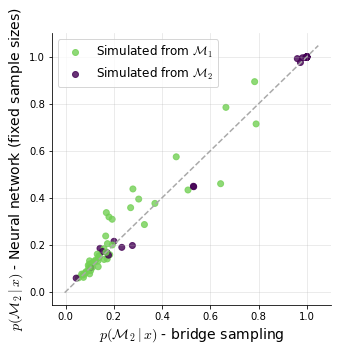

In [11]:
# PMPs
plot_approximations(bridge, NN_fixed, approximated_outcome='PMPs', NN_name='Neural network (fixed sample sizes)', save=False)

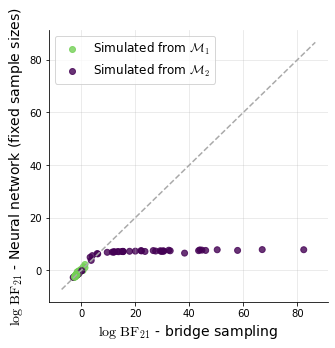

In [12]:
# Log BFs
plot_approximations(bridge, NN_fixed, approximated_outcome='Log BFs', NN_name='Neural network (fixed sample sizes)')

# of included datasets: 68


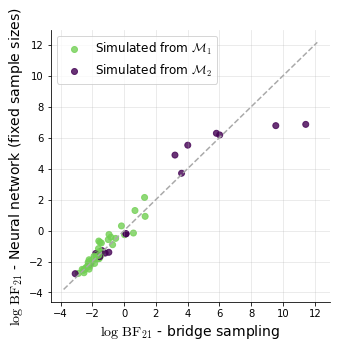

In [13]:
# Log Bfs with filter
filter = bridge['bayes_factor']<100000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_fixed_filtered = NN_fixed[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_fixed_filtered, approximated_outcome='Log BFs', NN_name='Neural network (fixed sample sizes)', save=False)

## BS vs variable NN

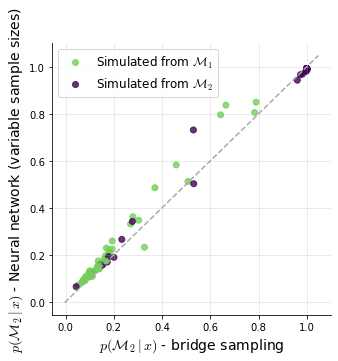

In [14]:
# PMPs
plot_approximations(bridge, NN_variable, approximated_outcome='PMPs', NN_name='Neural network (variable sample sizes)', save=False)

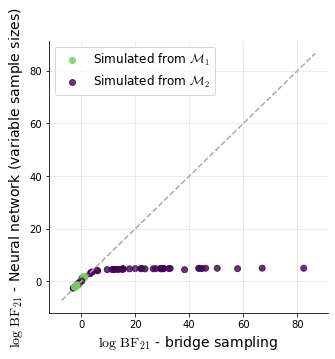

In [15]:
# Log BFs
plot_approximations(bridge, NN_variable, approximated_outcome='Log BFs', NN_name='Neural network (variable sample sizes)')

# of included datasets: 68


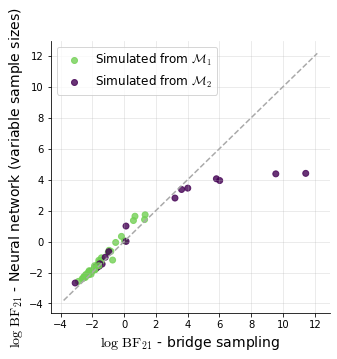

In [16]:
# Log Bfs with filter
filter = bridge['bayes_factor']<100000
bridge_filtered = bridge[filter].reset_index(drop=True)
NN_variable_filtered = NN_variable[filter].reset_index(drop=True)
print('# of included datasets: {}'.format(sum(filter)))

plot_approximations(bridge_filtered, NN_variable_filtered, approximated_outcome='Log BFs', NN_name='Neural network (variable sample sizes)', save=False)

# Plot together for publication

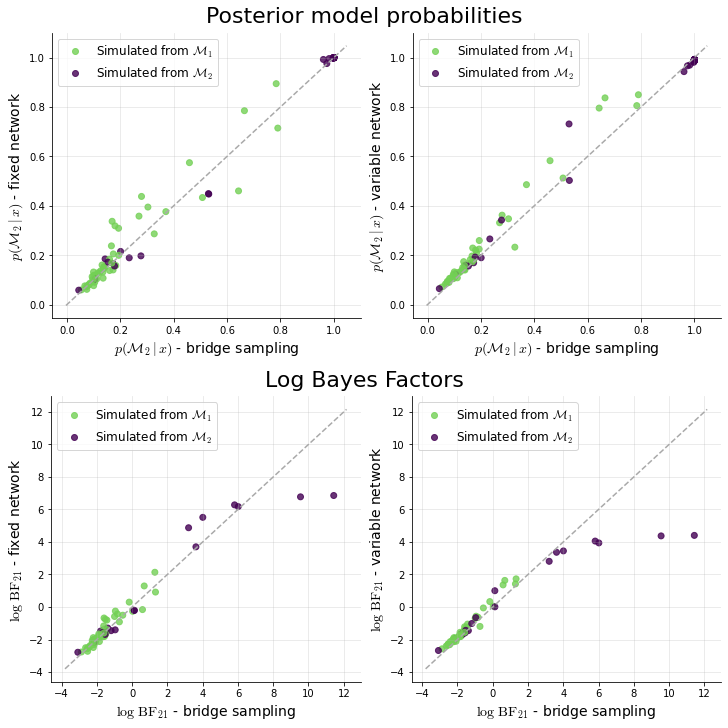

In [17]:
# Plot with PMP/log BF suptitles

fig = plt.figure(constrained_layout=True, figsize=(10, 10))
subfigs = fig.subfigures(nrows=2, ncols=1)
subfigure_titles = ['Posterior model probabilities', 'Log Bayes Factors']

bridge_list = [bridge, bridge_filtered]
NN_fixed_list = [NN_fixed, NN_fixed_filtered]
NN_variable_list = [NN_variable, NN_variable_filtered]

outcomes = ['PMPs', 'Log BFs']

# Use subfig to enable row titles
for row, subfig in enumerate(subfigs):
    subfig.suptitle(subfigure_titles[row], fontsize=22)

    # create 1x2 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=2)

    plot_approximations(bridge_list[row], NN_fixed_list[row], approximated_outcome=outcomes[row], NN_name='fixed network', ax=axs[0])
    plot_approximations(bridge_list[row], NN_variable_list[row], approximated_outcome=outcomes[row], NN_name='variable network', ax=axs[1])

plt.savefig('bs_comparison_convergence.png', dpi=300, bbox_inches='tight')

# Plot computation times as function of data sets

In [18]:
# Calculate computation times
bridge_time, NN_fixed_time, NN_variable_time = computation_times(bridge, NN_fixed, NN_variable)

In [19]:
# Mean computation times per phase
# Bridge Sampling
print('Stan: {}'.format(np.mean(bridge['stan_time'])))
print('Bridge: {}'.format(np.mean(bridge['bridge_time'])))

# NN fixed
print('NN fixed training: {}'.format(np.mean(NN_fixed['training_time'])))
print('NN fixed training in minutes: {}'.format(np.mean(NN_fixed['training_time'])/60))
print('NN fixed inference: {}'.format(np.mean(NN_fixed['inference_time'])))

# NN variable
print('NN variable training: {}'.format(np.mean(NN_variable['training_time'])))
print('NN variable training in minutes: {}'.format(np.mean(NN_variable['training_time'])/60))
print('NN variable inference: {}'.format(np.mean(NN_variable['inference_time'])))

Stan: 42.850982012748716
Bridge: 29.34168642282486
NN fixed training: 722.9514567999998
NN fixed training in minutes: 12.049190946666664
NN fixed inference: 0.0006955440000001003
NN variable training: 2810.423959399999
NN variable training in minutes: 46.84039932333332
NN variable inference: 0.0034660489999987004


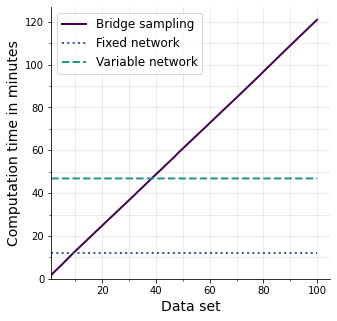

In [20]:
plot_computation_times(bridge_time, NN_fixed_time, NN_variable_time, save=True)

In [21]:
# Get minimum number of datasets for which NNs are faster than bridge sampling

print(np.where(bridge_time > NN_fixed_time)[0][0]+1) # +1 as numpy uses 0-based indexing
print(np.where(bridge_time > NN_variable_time)[0][0]+1) # +1 as numpy uses 0-based indexing

10
39
